In [6]:
import matplotlib.pyplot as plt
import json
import numpy as np
from pathlib import Path

In [11]:
def read_metrics(path):
    with open(Path(path)/"metrics.json") as f:
        d = json.load(f)
    #for k, v in d.items():
    #    d[k] = np.array(v, dtype=np.float64)
    return d

In [27]:
d = read_metrics("../../logs/3")

In [28]:
d.keys()

dict_keys(['accept_prob', 'energy', 'est_config_temp/net.0.bias_prior.p', 'est_config_temp/net.0.weight_prior.p', 'est_config_temp/net.2.bias_prior.p', 'est_config_temp/net.2.weight_prior.p', 'est_config_temp/net.4.bias_prior.p', 'est_config_temp/net.4.weight_prior.p', 'est_config_temp/noise_std.p', 'est_temperature/net.0.bias_prior.p', 'est_temperature/net.0.weight_prior.p', 'est_temperature/net.2.bias_prior.p', 'est_temperature/net.2.weight_prior.p', 'est_temperature/net.4.bias_prior.p', 'est_temperature/net.4.weight_prior.p', 'est_temperature/noise_std.p', 'loss', 'lr', 'preconditioner/net.0.bias_prior.p', 'preconditioner/net.0.weight_prior.p', 'preconditioner/net.2.bias_prior.p', 'preconditioner/net.2.weight_prior.p', 'preconditioner/net.4.bias_prior.p', 'preconditioner/net.4.weight_prior.p', 'preconditioner/noise_std.p', 'temperature'])

In [29]:
def plot_metric(ax, metric, *args, **kwargs):
    ax.plot(metric['steps'], metric['values'], *args, **kwargs)

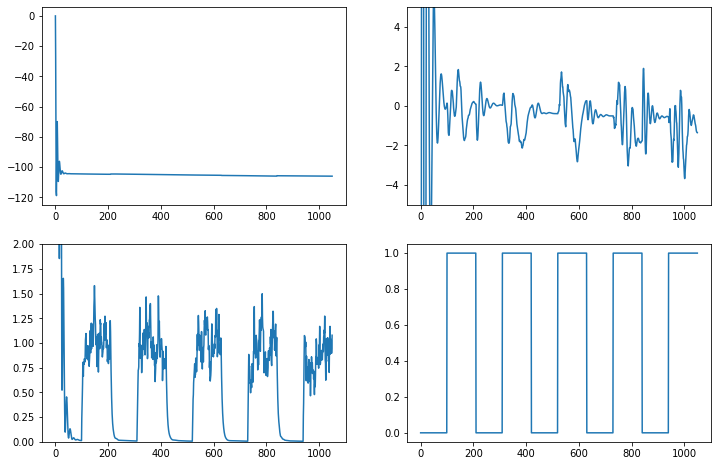

In [45]:
_, axes = plt.subplots(2, 2, figsize=(12, 8))
plot_metric(axes[0, 0], d['energy'])
plot_metric(axes[0, 1], d['est_config_temp/net.4.weight_prior.p'])
axes[0, 1].set_ylim((-5, 5))
plot_metric(axes[1, 0], d['est_temperature/net.4.weight_prior.p'])
axes[1, 0].set_ylim((0, 2))
plot_metric(axes[1, 1], d['temperature'])